In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, plot_confusion_matrix, roc_curve, auc, plot_roc_curve, confusion_matrix

In [2]:
data = pd.read_excel(r'C:\Users\vijaykrishna\Desktop\Courses\DS for Consulting\Assignment 6\Fitness Club Data.xlsx')

In [3]:
data.head()

,enrolldt,price,downpmt,monthdue,pmttype,use,age,gender,default
0,19970101,2178.85,250.00,6.0,4,1,0,2,0
1,19970101,1543.65,1543.65,6.0,1,0,0,2,0
2,19970101,1107.67,125.00,5.0,1,0,0,2,0
3,19970102,950.44,237.61,9.0,5,0,0,1,0
4,19970103,1436.00,250.00,9.0,3,0,0,2,0


In [4]:
data.describe()

,enrolldt,price,downpmt,monthdue,pmttype,use,age,gender,default
count,2.484300e+04,24843.000000,24843.000000,24843.000000,24843.000000,24843.000000,24843.000000,24843.000000,24843.000000
mean,1.997814e+07,1003.658899,199.824535,8.287290,3.093225,1.944371,29.203317,1.498007,0.115042
std,6.825852e+03,439.224768,335.437237,7.108381,1.560034,2.315550,13.277721,0.500006,0.319080
min,1.997010e+07,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,1.997082e+07,699.000000,49.000000,5.500000,1.000000,0.000000,22.000000,1.000000,0.000000
50%,1.998033e+07,999.000000,100.000000,6.000000,3.000000,1.000000,28.000000,1.000000,0.000000
75%,1.998101e+07,1249.000000,175.000000,9.000000,4.000000,3.000000,36.000000,2.000000,0.000000
max,1.999033e+07,9371.250000,9371.250000,120.000000,5.000000,8.000000,99.000000,2.000000,1.000000


C:\Users\vijaykrishna\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\vijaykrishna\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\vijaykrishna\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `h

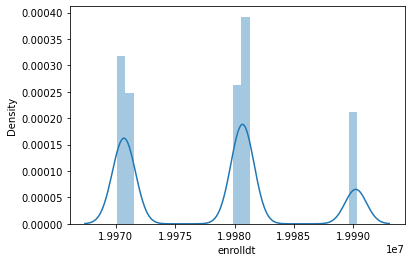

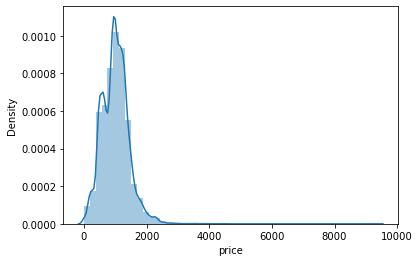

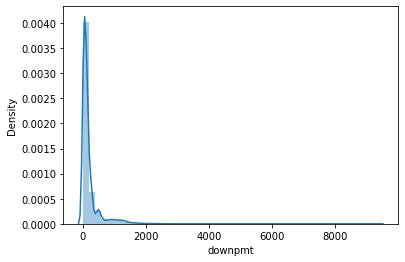

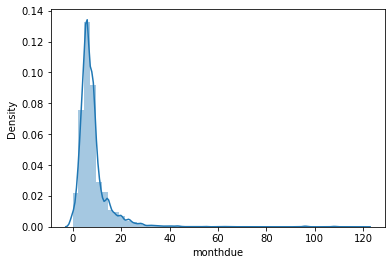

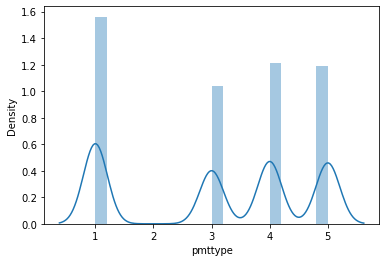

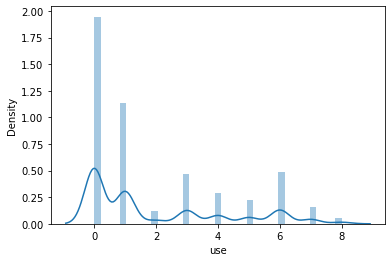

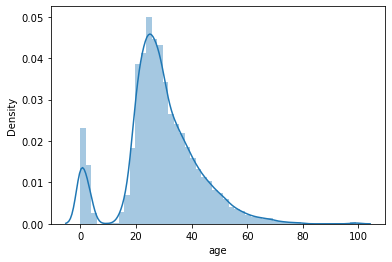

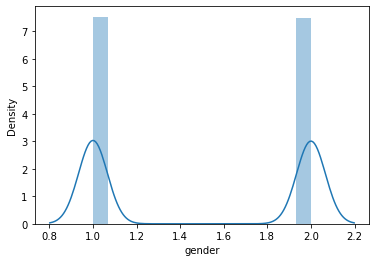

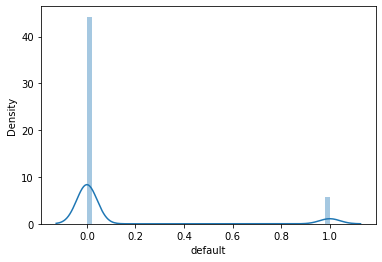

In [5]:
for i, col in enumerate(data.columns):
    plt.figure(i)
    sns.distplot(data[col])

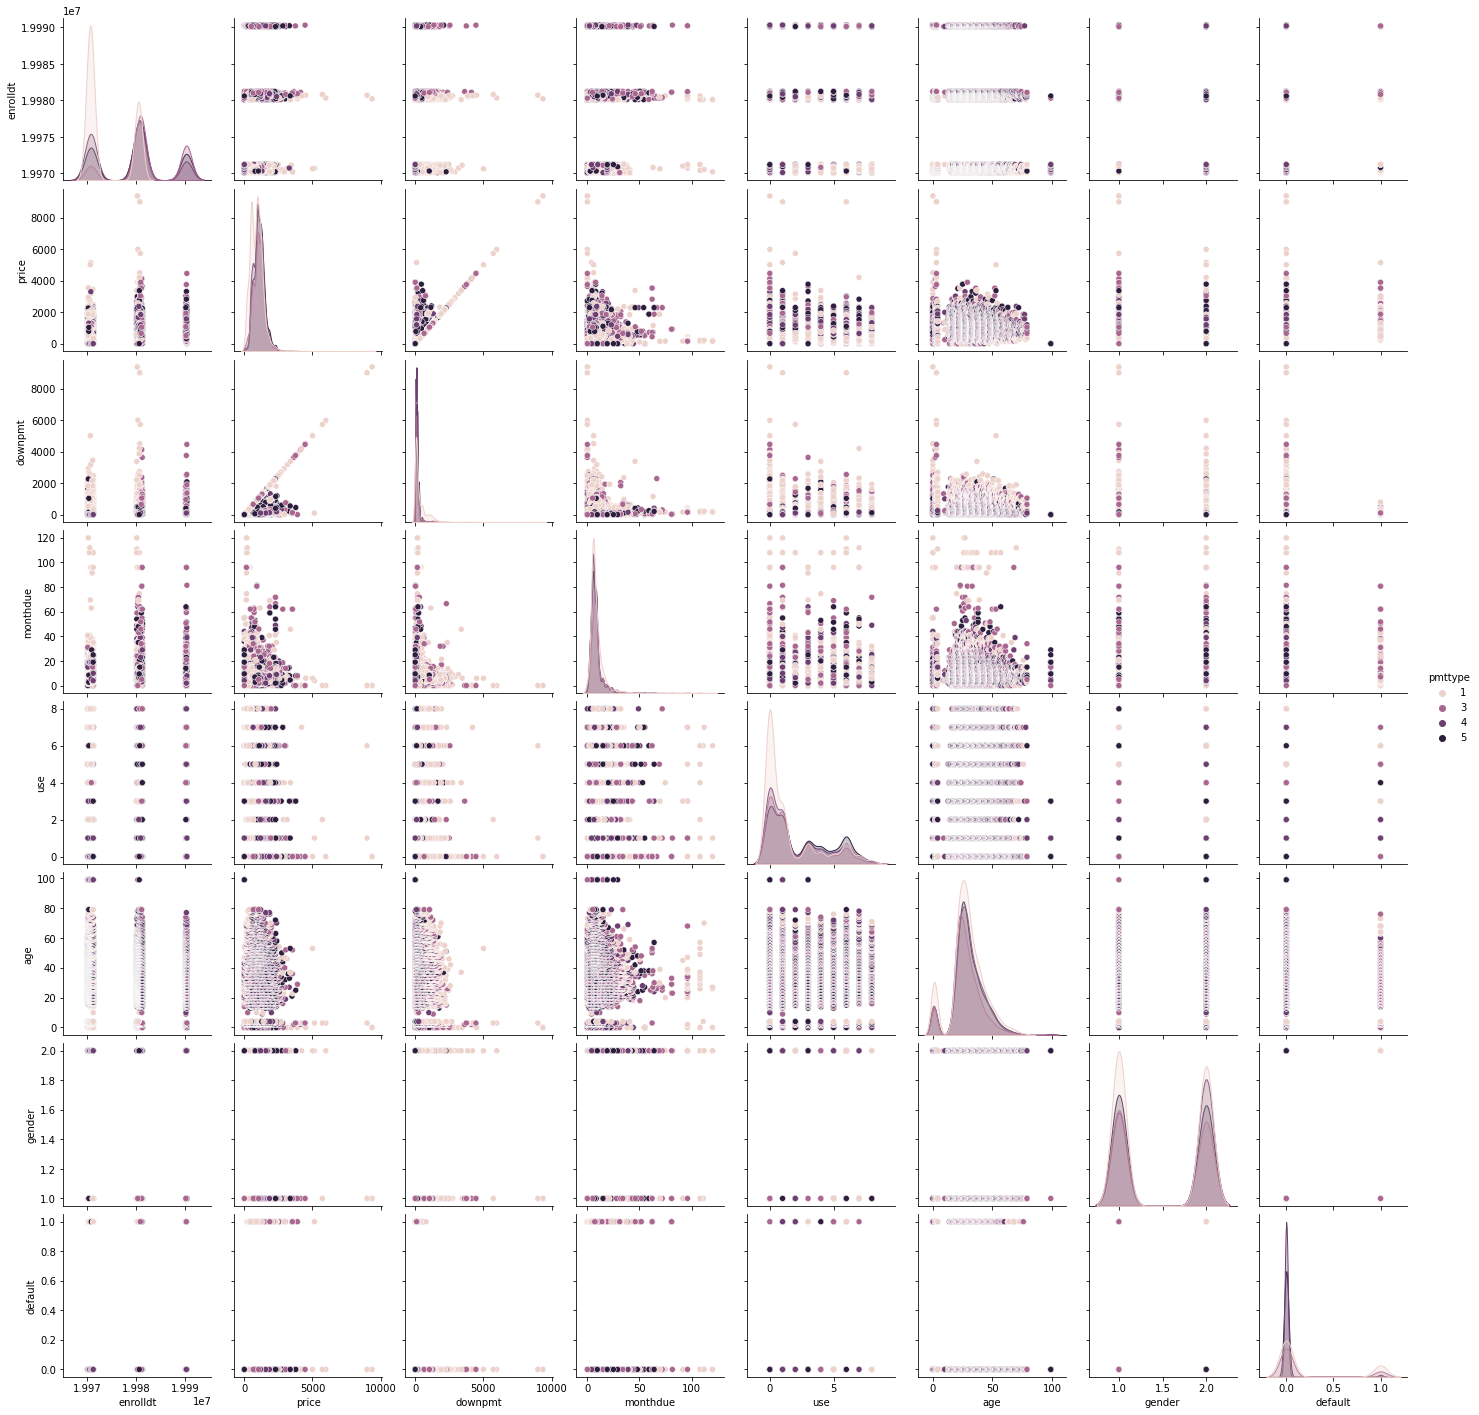

In [6]:
sns.pairplot(data, hue='pmttype')

<AxesSubplot:>

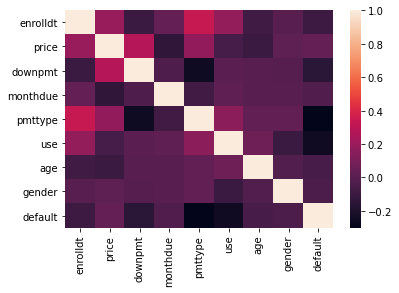

In [7]:
sns.heatmap(data.corr())

In [34]:
data.corr()

,enrolldt,price,downpmt,monthdue,pmttype,use,age,gender,default
enrolldt,1.000000,0.192736,-0.097261,0.039445,0.338917,0.181786,-0.081484,-0.001766,-0.092013
price,0.192736,1.000000,0.277764,-0.136978,0.173985,-0.059150,-0.097624,0.015797,0.039109
downpmt,-0.097261,0.277764,1.000000,-0.035659,-0.253638,0.006335,0.000483,-0.005857,-0.154872
monthdue,0.039445,-0.136978,-0.035659,1.000000,-0.076181,0.022503,0.002334,-0.002285,-0.030065
pmttype,0.338917,0.173985,-0.253638,-0.076181,1.000000,0.156922,0.026356,0.029344,-0.300139
use,0.181786,-0.059150,0.006335,0.022503,0.156922,1.000000,0.060523,-0.099707,-0.244411
age,-0.081484,-0.097624,0.000483,0.002334,0.026356,0.060523,1.000000,-0.021558,-0.055670
gender,-0.001766,0.015797,-0.005857,-0.002285,0.029344,-0.099707,-0.021558,1.000000,-0.038429
default,-0.092013,0.039109,-0.154872,-0.030065,-0.300139,-0.244411,-0.055670,-0.038429,1.000000


In [8]:
data.dtypes

enrolldt      int64
price       float64
downpmt     float64
monthdue    float64
pmttype       int64
use           int64
age           int64
gender        int64
default       int64
dtype: object

In [10]:
data.shape

(24843, 9)

In [11]:
data_1 = pd.DataFrame(data)

In [12]:
data_1 = data_1[data_1['age'] >= 16]
data_1 = data_1[data_1['age']!= 99]
data_1.shape

(22707, 9)

In [13]:
data_1 = data_1[data_1['price'] != data_1['downpmt']]
data_1.shape

(19649, 9)

In [14]:
data_1['enrolldt'] = pd.to_datetime(data_1['enrolldt'].astype(str), format="%Y-%m-%d")

In [15]:
data_1 = data_1[data_1['enrolldt'] < '1999-01-01']

In [16]:
data_1.shape

(16486, 9)

In [17]:
data_1.dtypes

enrolldt    datetime64[ns]
price              float64
downpmt            float64
monthdue           float64
pmttype              int64
use                  int64
age                  int64
gender               int64
default              int64
dtype: object

In [18]:
data_2 = data_1[['pmttype','use','default']]

In [19]:
data_3 = pd.get_dummies(data_2, columns=['pmttype','use'])

In [20]:
data_3

,default,pmttype_1,pmttype_3,pmttype_4,pmttype_5,use_0,use_1,use_2,use_3,use_4,use_5,use_6,use_7,use_8
2116,0,0,0,0,1,0,1,0,0,0,0,0,0,0
2117,0,1,0,0,0,1,0,0,0,0,0,0,0,0
2118,0,0,0,0,1,0,0,0,0,1,0,0,0,0
2119,0,0,0,0,1,1,0,0,0,0,0,0,0,0
2120,0,0,0,0,1,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24816,0,0,0,1,0,0,0,1,0,0,0,0,0,0
24817,0,0,0,0,1,0,0,0,0,0,0,1,0,0
24818,0,0,0,0,1,0,1,0,0,0,0,0,0,0
24819,0,0,0,0,1,1,0,0,0,0,0,0,0,0


In [21]:
X = data_3.loc[:, data_3.columns != 'default']
Y = data_3['default']

In [22]:
print(X.shape, Y.shape)

(16486, 13) (16486,)


In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=42)

In [24]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(11540, 13) (4946, 13) (11540,) (4946,)


In [25]:
logreg = LogisticRegression()

In [26]:
clf = logreg.fit(X_train, y_train)

In [27]:
y_pred = logreg.predict(X_test)

In [28]:
logreg.score(X_test, y_test)

0.860088960776385

In [29]:
report = classification_report(y_test, y_pred)

In [30]:
report

'              precision    recall  f1-score   support\n\n           0       0.92      0.92      0.92      4173\n           1       0.55      0.55      0.55       773\n\n    accuracy                           0.86      4946\n   macro avg       0.73      0.73      0.73      4946\nweighted avg       0.86      0.86      0.86      4946\n'

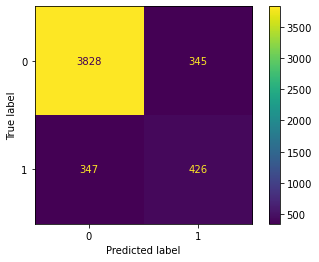

In [31]:
plot_confusion_matrix(clf, X_test, y_test)

In [32]:
confusion_matrix(y_test, y_pred)

array([[3828,  345],
       [ 347,  426]], dtype=int64)

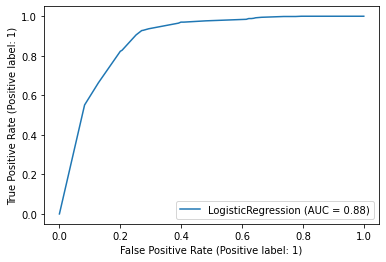

In [33]:
plot_roc_curve(clf, X_test, y_test)